In [34]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [35]:
# Create graph from data
data = pd.read_csv(r"C:\Users\PV\Downloads\lastfm_asia\lasftm_asia\lastfm_asia_edges.csv")# Convert pandas dataframe to networkx graph
graph = nx.from_pandas_edgelist(data, source='node_1', target='node_2')

edge_list = list(graph.edges())
node_list = list(graph.nodes())

# Print the graph
print(graph)

Graph with 7624 nodes and 27806 edges


#### Feld's Friendship Paradox

In [66]:
# Randomly sample 5000 nodes
random_nodes_1 = random.choices(node_list, k=5000)
random_degree_1 = [graph.degree(node) for node in random_nodes_1]

In [67]:
# Feld's Friendship Paradox: friends of friends >= friends of individual

# Randomly sample an edge (5000 times)
sampled_edges = random.choices(edge_list, k= 5000)

chosen_nodes_1 = []
chosen_degree_1 = []

# Randomly choose one node from each sampled edge
for edge in sampled_edges:
    random_node = edge[0] if random.random() < 0.5 else edge[1]
    chosen_nodes_1.append(random_node)
    chosen_degree_1.append(graph.degree(random_node)) # Record the chosen node connectivity

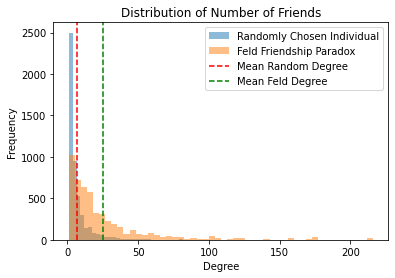

In [68]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot of number of friends of randomly chosen individual
ax.hist(random_degree_1, bins=50, alpha=0.5, label='Randomly Chosen Individual')

# Plot the histogram of Feld's Friendship Paradox
ax.hist(chosen_degree_1, bins=50, alpha=0.5, label='Feld Friendship Paradox')

# Illustrate the mean values
ax.axvline(np.mean(random_degree_1), color='r', linestyle='--', label='Mean Random Degree')
ax.axvline(np.mean(chosen_degree_1), color='g', linestyle='--', label='Mean Feld Degree')

# Set labels and title
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Friends')


# Add legend
ax.legend()

# Show the plot
plt.show()


#### Hofstad's Friendship Paradox

In [69]:
# Randomly sample 5000 nodes
random_nodes_2 = random.choices(node_list, k=5000)
random_degree_2 = [graph.degree(node) for node in random_nodes_2]

In [70]:
# Hofstad's Friendship Paradox: randomly choose a person, friends of friends of that person >= friends of that person

# Randomly sample a node (5000 times)
chosen_nodes_2 = random.choices(node_list, k=5000)
chosen_degree_2 = [graph.degree(node) for node in chosen_nodes_2]

# Randomly choose a neighbor of each node
chosen_neighbor = []
chosen_neighbor_degree = []
for node in chosen_nodes_2:
    random_neighbor = random.choice(list(graph.neighbors(node)))
    chosen_neighbor.append(random_neighbor)
    chosen_neighbor_degree.append(graph.degree(random_neighbor))

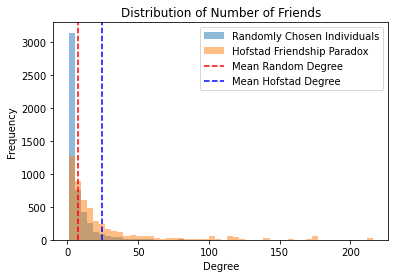

In [71]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot of number of friends of randomly chosen individual
ax.hist(random_degree_2, bins=50, alpha=0.5, label='Randomly Chosen Individuals')

# Plot the histogram of Hofstad's Friendship Paradox
ax.hist(chosen_neighbor_degree, bins=50, alpha=0.5, label='Hofstad Friendship Paradox')

# Illustrate the mean values
ax.axvline(np.mean(random_degree_2), color='r', linestyle='--', label='Mean Random Degree')
ax.axvline(np.mean(chosen_neighbor_degree), color='b', linestyle='--', label='Mean Hofstad Degree')

# Set labels and title
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Friends')

# Update the legend
ax.legend()

# Show the plot
plt.show()

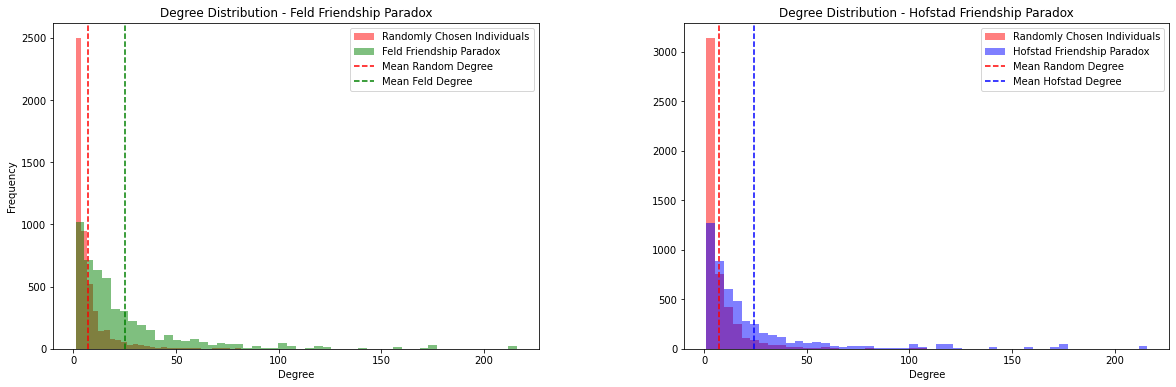

In [77]:
# Comparing two phenomena

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Feld's Friendsip Paradox
ax1.hist(random_degree_1, bins=50, alpha=0.5, color = 'r', label='Randomly Chosen Individuals')
ax1.hist(chosen_degree_1, bins=50, alpha=0.5, color='g', label='Feld Friendship Paradox')
ax1.axvline(np.mean(random_degree_1), color='r', linestyle='--', label='Mean Random Degree')
ax1.axvline(np.mean(chosen_degree_1), color='g', linestyle='--', label='Mean Feld Degree')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Frequency')
ax1.set_title('Degree Distribution - Feld Friendship Paradox')
ax1.legend()

# Hofstad's Friendship Paradox
ax2.hist(random_degree_2, bins=50, alpha=0.5,color='r', label='Randomly Chosen Individuals')
ax2.hist(chosen_neighbor_degree, bins=50, alpha=0.5, color='b', label='Hofstad Friendship Paradox')
ax2.axvline(np.mean(random_degree_2), color='r', linestyle='--', label='Mean Random Degree')
ax2.axvline(np.mean(chosen_neighbor_degree), color='b', linestyle='--', label='Mean Hofstad Degree')
ax2.set_xlabel('Degree')
ax2.set_title('Degree Distribution - Hofstad Friendship Paradox')
ax2.legend()

plt.subplots_adjust(wspace=0.3)
plt.show()
